<a href="https://colab.research.google.com/github/nayoung718/essa_python_1/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_4%EC%9E%A5_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8_p_157_202_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#핸즈온 4장 모델 훈련 p.157 - 202 필사

##chapter 4 모델 훈련

###4.1 선형회귀

선형 회귀 모델의 예측: 입력 특성의 가중치 합과 편향(절편)이라는 상수를 더해 예측을 만듦

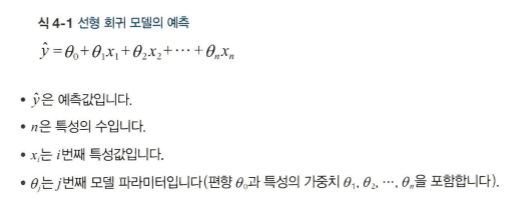

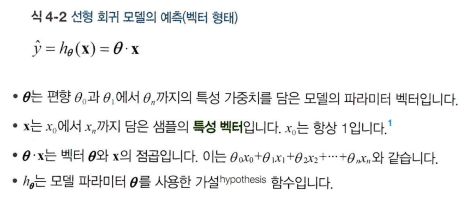

모델 훈련-> 훈련셋에 가장 잘 맞도록 모델 파라미터 설정

-> 얼마나 잘 맞는지 대표 측정 지표: RMSE
-> RMSE 최소화하는 세타 찾기 (MSE 최소화가 같은 결과고 더 간단)

MSE 비용함수

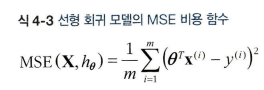

###4.1.1 정규방정식

정규방정식: 비용함수 최소화하는 세타값 찾기 위한 해석적 방법

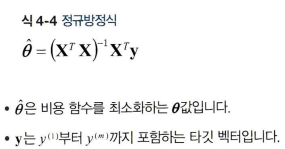

In [2]:
import numpy as np

X= 2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

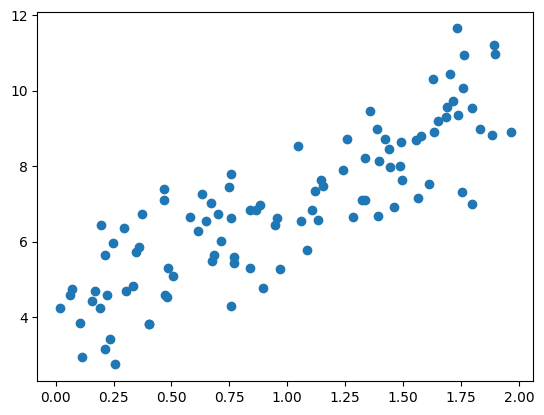

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.show()

In [4]:
#정규방정식 사용해 세타햇 계산
X_b=np.c_[np.ones((100,1)),X] #모든 샘플에 x0=1을 추가
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.00936962],
       [2.96870374]])

In [5]:
#4.215, 2.77 대신 4와 3 기대했지만 잡음 때문에 원래 함수의 파라미터를 정확히 재현 못함 세터햇을 이용해 예측해보자
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[4.00936962],
       [9.9467771 ]])

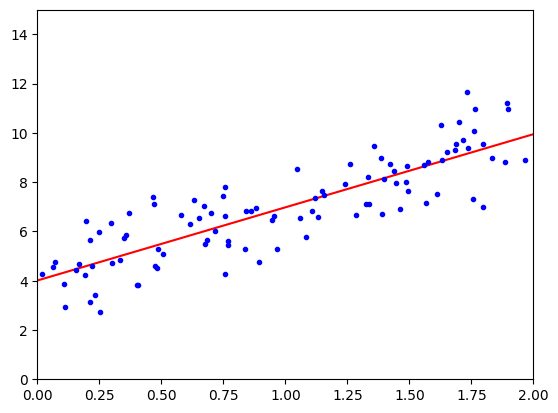

In [6]:
plt.plot(X_new, y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [7]:
#사이킷런에서 선형회귀 수행
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.00936962]), array([[2.96870374]]))

In [8]:
theta_best_svd, residuals, rank, s=np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.00936962],
       [2.96870374]])

In [9]:
#thetahat=X+y 계산-> X+ 는 x의 유사역행렬(무어펜로즈 역행렬)-> np.linalg.pinv()로 구할수있음
np.linalg.pinv(X_b).dot(y)

array([[4.00936962],
       [2.96870374]])

유사역행렬은 특잇값 분해라 부르는 표준행렬분해기법 사용해 계산됨 -> SVD는 훈련 셋 행렬 x 를 3개의 행렬 곱셈 USIGMAV^T로 분해함

유사역행렬은 x+=VSIGMA+U^T로 계산됨

SIGMA+계산을 위해 SIGMA 먼저 구하고 그다음 어떤 낮은 임계값보다 작은 모든 수를 0으로 바꿈 그후 0이 아닌 모든값 역수로 치환, 마지막 행렬 전치

###4.1.2 계산복잡도

역행렬을 계산하는 계손복잡도는 O(n^2.4)에서 O(n^3) 사이

-사이킷런 선형회귀 클래스 SVD: O(N^2) -> 특성 개수가 두배로 늘어나면 계산시간 4배

###4.2 경사 하강법

경사하강법: 여러 종류 문제에서 최적의 해법을 찾을 수 있는 일반적 최적화 알고리즘: 비용함수 최소화위해 반복해서 파라미터 조정

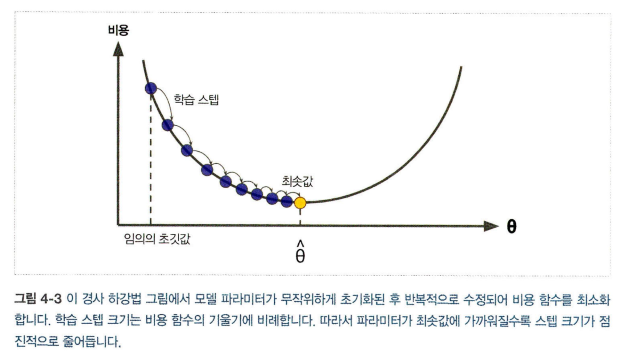

경사하강법에서 중요한 파라미터: 스텝의 크기 -> 학습률 하이퍼파라미터로 결정됨

-학습률이 너무 작으면 알고리즘 수렴 위해 반복 많이 진행해 시간 오래걸림

-학습률 너무 크면 반대편으로 건너뛰게되어 이전보다 더 높은곳으로 올라가게될지 모름

-> 무작위 초기화떄문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴

선형회귀를 위한 mse 비용함수는 볼록함수로 지역 최솟값 없고 하나의 전역 최솟값만 있어서 경사하강법이 전역 최솟값에 가깝게 접근 가능

-특성 스케일 적용하면 더 빠르게 최솟값 도달

모델훈련-> 모델의 파라미터공간에서 찾음

###4.2.1 배치 경사 하강법

모델파라미터에 대해 비용함수의 그레이디언트 계산 -> 파라미터 변경에 비용함수 얼마나 바뀌는지 계산: 편도함수

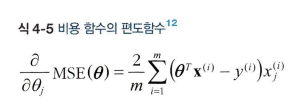

배치 경사하강법

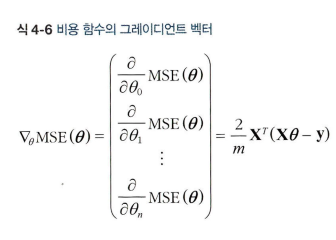

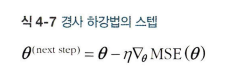

알고리즘으로 구현해보자

In [10]:
eta=0.1 #학습률
n_iterations=1000
m=100

theta=np.random.randn(2,1) #무작위 초기화

for iteration in range(n_iterations):
  gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta=theta-eta*gradients

theta

array([[4.00936962],
       [2.96870374]])

학습률 바꿔보면

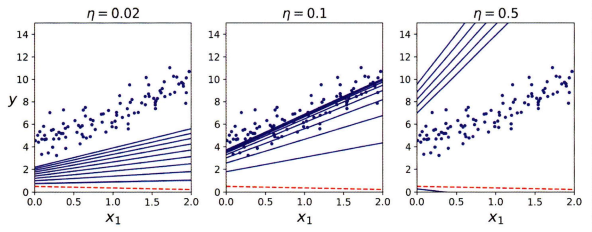

학습률이 너무 낮으면 최저점에는 도달하지만 시간이 오래걸리며, 너무 높으면 최적점에서 멀어져 발산함-> 적절한 학습률은 그리드 탐색 사용해 찾음(반복횟수제한-반복횟수 크게 지정후 그레이디언트 벡터가 아주 작아지면, 벡터의 노름이 허용 오차보다 작아지면 경사하강법이 최솟값이므로 알고리즘 중지)

-수렴율: 비용함수가 볼록함수, 기울기 급격히 바뀌지 않는 경우-> 학습률을 고정한 배치 경사 하강법은 최적의 솔루션에 수렴 : O(1/엡실론)의 반복

###4.2.2 확률적 경사하강법

-확률적 경사하강법: 매스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산

무작위성-> 불안정, 비용함수가 최솟값갈때까지 위아래로 요동치며 평균적으로 감소(최적치X)

-> 학습률 점진적 감소시키기(담금질 기법과 유사) - 매 반복서 학습률 결정하는 함수(학습 스케쥴) : 너무 빨리 줄어들면 최소값까지 가는 중간 멈춰버리거나 천천히 즐어들면 너무 일찍 중지해 지역 최소값에 머무를수 있음

학습 스케줄을 사용한 확률적 경사 하강법 구현

In [11]:
n_epochs = 50
t0, t1=5, 50 #학습스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0/(t+t1)

theta=np.random.randn(2,1) #무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index=np.random.randint(m)
    xi=X_b[random_index:random_index+1]
    yi=y[random_index:random_index+1]
    gradients=2*xi.T.dot(xi.dot(theta)-yi)
    eta=learning_schedule(epoch*m+i)
    theta=theta-eta*gradients


epoch 에포크: 반복

In [12]:
theta

array([[4.01344931],
       [2.99718865]])

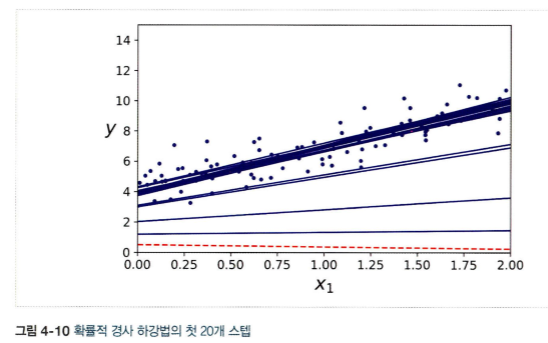

In [13]:
#사이킷런에서 sgd 방식으로 선형회귀 사용하려면 기본값으로 제곱 오차 비용함수 최적화하는 sgdregressor 클래스 사용-> 사용해봐
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())


SGDRegressor(eta0=0.1, penalty=None)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.04117549]), array([2.99798991]))

###4.2.3 미니배치 경사 하강법

-미니배치 경사 하강법: 미니배치라 부르는 임의의 작은 샘플 셋에 대해 그레이디언트를 계산

-> 장점: 행렬 연산에 최적화된 하드웨어, gpu 사용해서 얻는 성능 향상

-미니배치를 크게하면 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직임-> 결국 SGD보다 최솟값에 더 가까이 도달하게 될 것

세 가지 경사 하강법 알고리즘이 훈련과정동안 파라미터 공간에서 움직인 경로

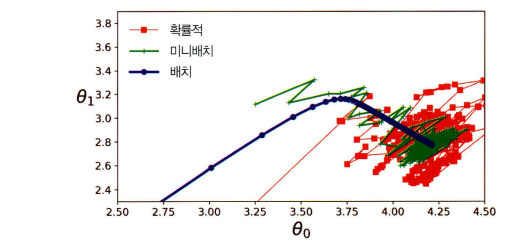

배치 경사 하강법의 경로가 실제로 최솟값에 멈춘 반면 확률적 경사 하강법과 미니배치 경사 하강법은 근처에 맴돈다-> 배치 경사 하강법은 많은 시간 소요, 확률적 경사하강법과 미니배치경사하강법은 적절한 학습 스케줄을 사용하면 최솟값에 도달



선형 회귀 비교

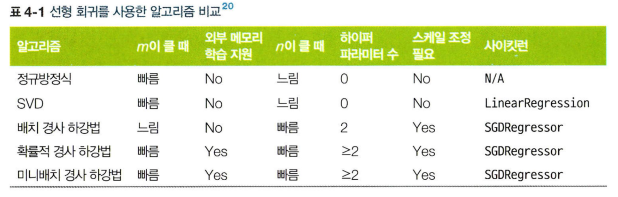



##4.3 다항회귀

-다항 회귀: 각 특성의 거듭제곡을 새로운 특성으로 추가하고, 이를 포함한 데이터셋에 선형 모델을 훈련시키는것

In [15]:
#2차방정식으로 비선형 데이터 생성
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

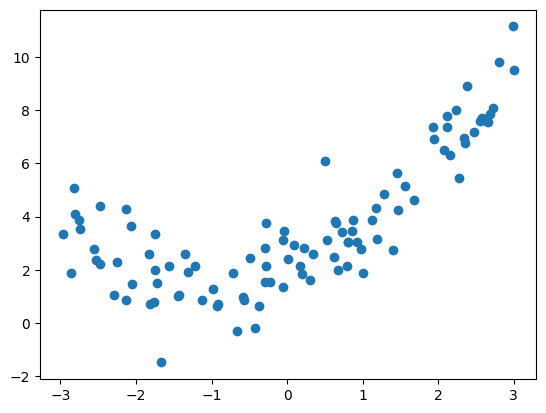

In [16]:
plt.scatter(X,y)
plt.show()

In [17]:
#직선은 잘 안맞음, 사이킷런의 PolynomialFeatures 사용해 훈련데이터 변환, 각 특성을 제곱하여 새 특성으로 추가
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([-1.8160236])

In [18]:
X_poly[0]

array([-1.8160236 ,  3.29794172])

In [19]:
#선형회귀 적용
lin_reg=LinearRegression()

In [20]:
lin_reg.fit(X_poly,y)

LinearRegression()

In [21]:
lin_reg.intercept_, lin_reg.coef_

(array([2.00240055]), array([[1.02984605, 0.530156  ]]))

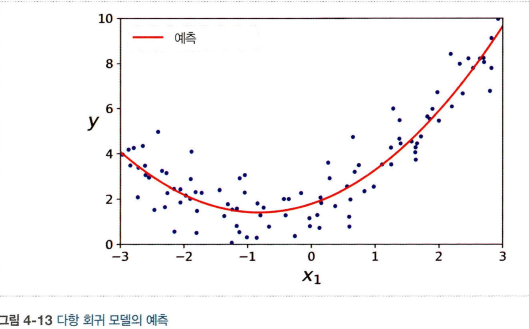

주어진 차수까지 특성 간의 모드 뇩차항 추가하여 특성 사이의 관계 찾을 수 있음

##4.4 학습곡선

고차 다항 회귀 적용시 더 훈련데이터에 잘 맞추려함

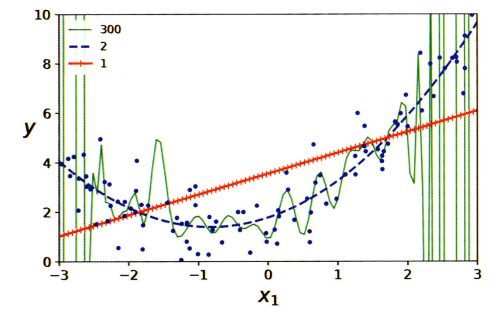

-> 고차 다항 회귀 모델은 심각히 훈련데이터에 과대적합 / 선형모델은 과소적합

-> 가장 일반화 잘될 모델: 2차 다항 회귀

- 모델의 일반화 성능 추정: 교차검증 / 학습곡선(훈련셋과 검증 셋의 모델 성능을 훈련 셋 크기의 함수로 나타냄_

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict=model.predict(X_train[:m])
    y_val_predict=model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='훈련 세트')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='검증 세트')

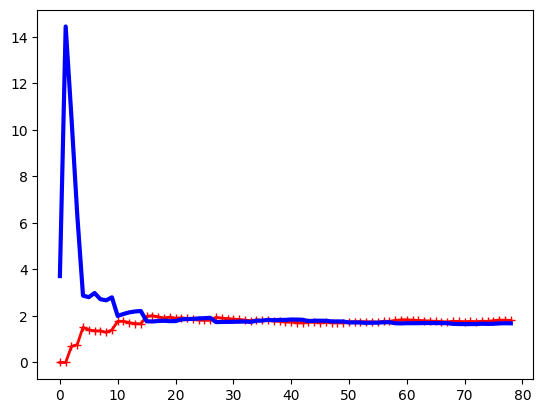

In [23]:
#단순 선형 회귀 모델의 학습곡선
lin_reg=LinearRegression()
plot_learning_curves(lin_reg, X,y)

그래프 0에서 시작해서 훈련셋에 하나/둘 샘플이 있을땐 모델이 완벽 작동-> 샘플 추가에 따라 잡음, 비선형이라 완벽히 학습 불가능-> 평편해질때까지 오차 계속 상승

-> 모델 적은 수 샘플로 훈련시 일반화 될 수 없어서 검증 오차가 초기에 매우 큼

10차 다항 회귀 모델의 학습 곡선 그리기

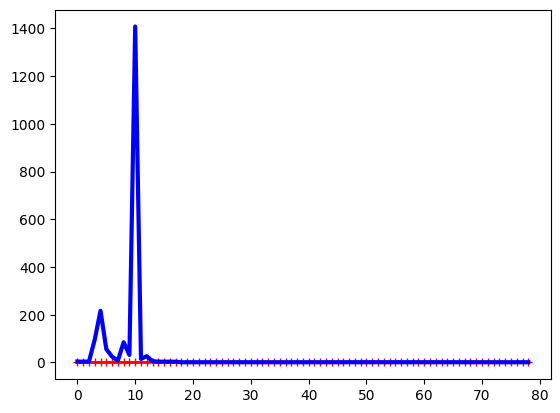

In [24]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),])
plot_learning_curves(polynomial_regression, X, y)

차이: 훈련 데이터 오차가 선형 회귀 모델보다 훨씬 낮음 / 두 곡선 사이의 공간이 있음(모델 성능이 검증 데이터 보다 훨씬 낫다(과대적합), 더 큰 훈련 셋 사용시 두 곡선 가까워짐)

-편향/분산 트레이드오프: 모델 복잡도 커지면 분산 늘어나고 편향 줄어듦, 복잡도 줄어들면 편향 커지고 분산 작아짐

##4.5 규제가 있는 선형 모델

과대적합 감소- 모델 규제

자유도 줄이면 과대적합되기 더 어려워짐-> 모델 규제: 다항식 차수 감소시키기

###4.5.1 릿지회귀

릿지회귀: 규제 추가된 선형 회귀버전: 규제항이 비용함수에 추가됨: 모델 가중치가 작게 유지되도록 -> 규제항은 훈련동안에만 비용함수에 추가됨(끝나면 규제없는 성능지표로 평가)

하이퍼파라미터 알파: 모델 얼마나 많이 규제할지 조절-> 0이면 선형회귀와 같아짐, 크면 모든 가중치가 거의 0에 가까워지고 데이터 평균을 지나는 수평선 됨

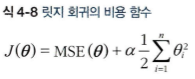

편향은 규제되지 않음

왼쪽 그래프는 평범한 릿지모델 사용한 선형적 예측, 오른쪽 그래프는 polynomialfeatures(degree=10)을 사용해 먼저 데이터 확장하고 standardscaler를 사용해 스케일을 조정한 후 릿지 모델 적용(알파 증가시킬수록 직선 가까워짐=모델 분산 줄지만 평향 커짐)

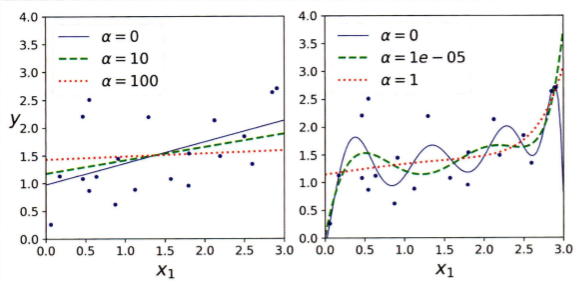

릿지 회귀계산에도 정규방정식, 경사하강법 사용 가능

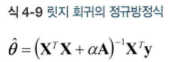

사이킷런에서 정규방정식을 사용한 릿지 회귀 적용해봄

In [25]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.12473393]])

In [26]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.1064578])

penalty 매개변수는 사용할 규제 지정 : l2-> SGD가 비용함수에 가중치 벡터의 L2 노름의 제곱을 2로 나눈 규제항을 추가하게 만듦 = 릿지 회귀

###4.5.2 라쏘회귀

라쏘회귀: 선형회귀의 또다른 규제된 버전: 가중치 벡터의 l1 노름을 사용

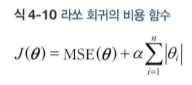

라쏘 규제를 사용한 선형 회귀와 다항 회귀 (알파값에 대한 차이)

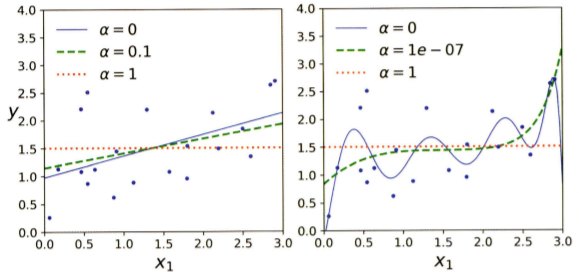

-라쏘 회귀 특징: 덜 중요한 특서의 가중치를 제거하려고 함-> 자동 특성 선택해 희소 모델 만듦

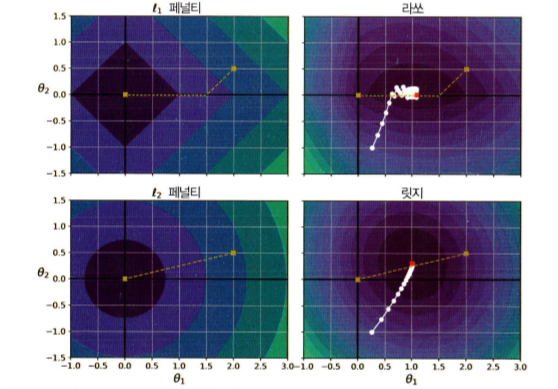

두 축은 모델 파라미터 두개를 나타내고 배경의 등고선은 각기 다른 손실 함수 나타냄

둘째 알파 증가시킬수록 최적 파라미터(빨간 사각)가 원점에 더 가까워짐

라쏘의 비용함수는 세타i=0에서 미분 불가능-> 세타i=0일때 서브그레이디언트 벡터 g를 사용하면 경사 하강법을 적용하는데 문제 없음

경사하강법을 위해 라쏘 비용함수에 사용할수있는 서브그레이디언트 벡터 공식

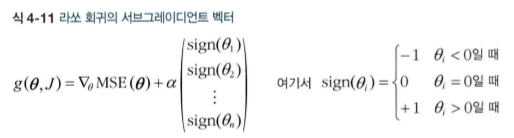


In [28]:
#lasso 클래스 사용한 사이킷런 예제
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])
#lasso 대신 sgdregresso(penalty="l1") 사용 가능

array([5.08079347])

###4.5.3 엘라스틱넷

엘라스틱넷: 릿지+라쏘 (규제항 둘이 더해서, 혼합정도는 혼합비율 r사용해 조절/0이면 릿지, 1이면 라쏘)

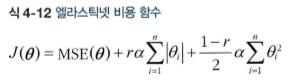

특성 수가 훈련 샘플 수보다 많거나 특성 몇개가 강하게 연관되어 있을때는 보통 라쏘가 문제 일으키므로 라쏘보다 엘라스틱넷 선호

In [29]:
#사이킷런 elasticnet 사용 예제
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.08042786])

###4.5.4 조기종료

-조기 종료: 반복 학습 알고리즘 규제하는 것, 검증 에러가 최솟값에 도달하면 훈련 중지

에포크가 진행됨에 따라 알고리즘 학습되어 rmse와 검증세트에 대한 예측 에러 줄어듦 그러나 감소하던 검증 에러가 멈추었다가 다시 상승-> 과대적합

-> 조기 종료: 검증 에러가 최소 도달하는 즉시 훈련 멈춤

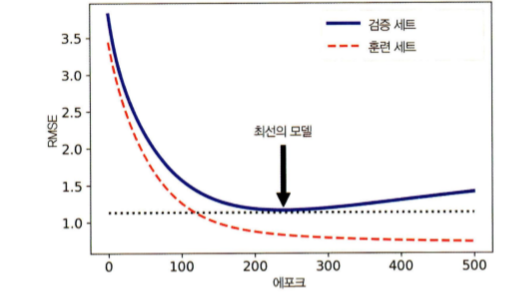



In [31]:
#조기 종료 구현 코드

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

#데이터준비

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled,y_train.ravel()) #훈련을 이어서 진행
  y_val_predict= sgd_reg.predict(X_val_poly_scaled)
  val_error= mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error= val_error
    best_epoch= epoch
    best_model= clone(sgd_reg)

warm_start=True로 지정하면 fit메서드 호출될 때 처음부터 다시 시작안하고 이전 모델 파라미터서 훈련 이어감

##4.6 로지스틱 회귀

샘플이 특정 클래스에 속할 확률 추정시 널리 사용 (이진분류기)

###4.6.1 확률추정

입력 특성의 가중치 합 계산

결과값의 로지스틱 출력
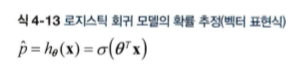

로지스틱은 0과 1사이의 값을 출력하는 시그모이드 함수

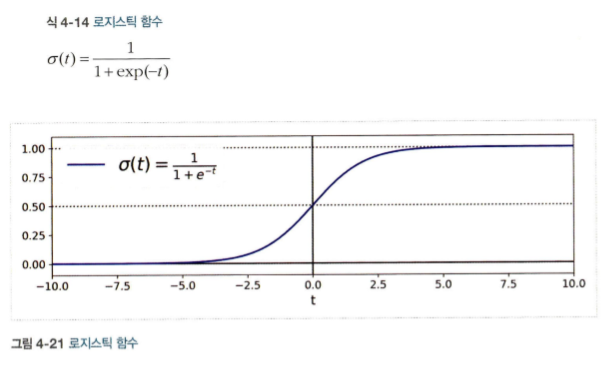

로지스틱 회귀 모델이 샘플 x가 양성 클래스에 속할 확률 p hat을 추정하면 이에 대한 예측 y hat을 쉽게 구할 수 있음
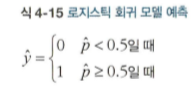

양수일때 1, 음수일때 0으로 예측

###4.6.2 훈련과 비용함수

어떻게 훈련시킴? 훈련 목적은 양성 샘플에 대해 높은 확률 추정, 음성샘플에 대해 낮은 확률 추정하는 모델의 파라미터 벡터 세타 찾기

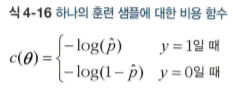

비용함수는 t가 0에 가까워지면 -log(t)가 매우 커지므로 타당

모델이 양성샘플을 0에 가까운 확률로 추정시 비용 크게 증가할 것, 1에 가까운 확률로 추정해도 비용 증가

-> 음성 샘플의 확률을 0에 가깝게 추정 또는 양성 샘플 확률 1에 가깝게 추정시 비용 0에 가까워짐

-> 전체 훈련셋에 대한 비용함수는 모든 훈련 샘플의 비용 평균화한것 : 로그 손실
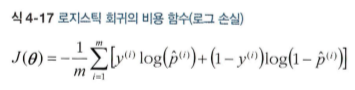

이 비용함수의 최솟값 계산하는 알려진 해 없음

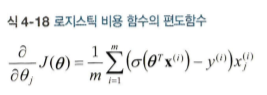

각 샘플에 대해 예측 오차 계산하고 j번째 특성값을 곱해 모든 훈련 샘플에 대해 평균 내는 로지스틱 비용 함수의 편도함수

###4.6.3 결정경계

붓꽃데이터셋 사용해 로지스틱 회귀 설명

In [32]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [33]:
X= iris['data'][:, 3:] # 꽃잎의 너비
y= (iris['target']==2).astype(int) # 1 Iris-Virginica면 1, 아니면 0

In [34]:
#로지스틱 회귀 모델 훈련

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

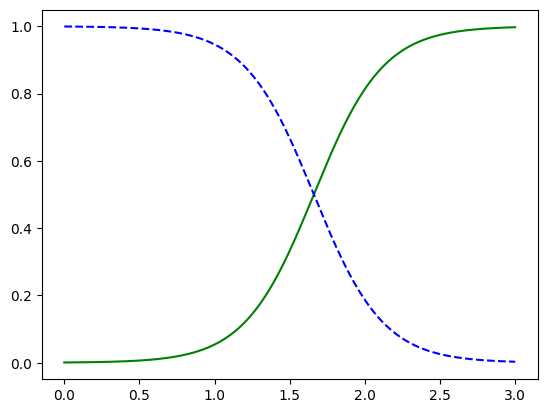

In [35]:
#꽃잎 너비 0~3cm인 꽃에 대해 모델 추정 확률 계산해보기
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not Iris virginica')
#다음은 이미지를 미려하게 출력하기 위한 맷플롯립 코드가 이어집니다.

꽃잎 너비 2cm 이상과 1cm 아래 / 두 극단 사이에서는 분류가 확실하지 않음

-> 클래스 예측하려하면 가장 가능성 높은 클래스 반환

In [36]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

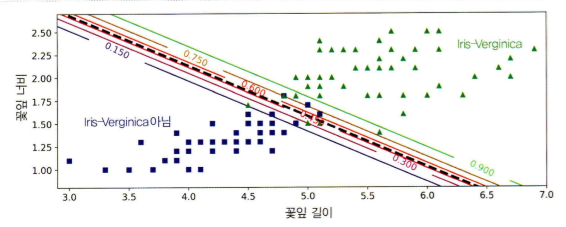

꽃잎의 너비와 꽃잎 길이 두개의 특성으로 보여줌-> 로지스틱 회귀 분류기가 이 기반으로 새 꽃이 iris-verginica 인지 확률 추정 (경계 선형: 모델 50% 확률 추정지점 점선)

-로지스틱도 l1, l2 페널티 사용해 규제 가능

###4.6.4 소프트맥스 회귀

로지스틱 회귀 모델은 여러개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스 지원하도록 일반화: 소프트맥스 회귀(=다항로지스틱회귀)

샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 sk(x) 계산하고 그 점수에 소프트맥스 함수 적용해 각 클래스 확률 추정

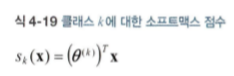

파라미터 행렬: 행으로 각 클래스의 자신만의 파라미터 벡터

-로짓(로그-오즈): 각 점수에 지수 함수를 적용한 후 정규화

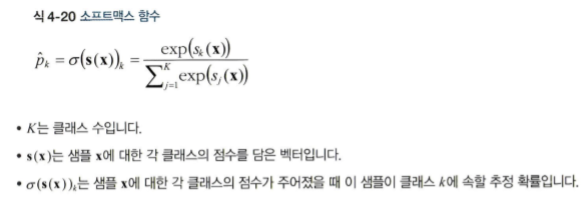

소프트맥스 회귀 분류기는 추정확률이 가장 높은 클래스 선택

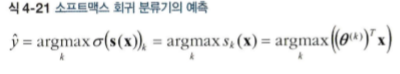

모델이 타깃 클래스에 대해 높은 확률을 추정하도록 만드는 것이 목적

-크로스 엔트로피 비용함수를 최소화: 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 목적에 부합

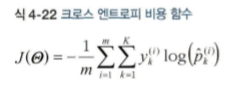

두개의 클래스가 있을 때 비용함수(크로스 엔트로피)는 로지스틱 회귀의 비용함수와 같다

이 비용함수의 세타에 대한 그레이디언트 벡터는 다음과 같음

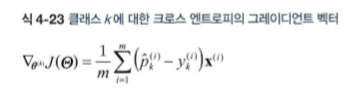

각 클래스에 대한 그레디언트 벡터를 계산할 수 있으므로 비용함수 최소화를 위한 파라미터 행렬을 찾기 위해 경사하강법 사용 가능

소프트 맥스 회귀를 사용해 붓꽃은 세개 클래스로 분류해보자 multi_class 매개변수를 multinomial로 바꾸면 소프트맥스 회귀 사용 가능

In [37]:
X = iris['data'][:, (2,3)] #꽃잎 길이, 꽃잎 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [38]:
#꽃잎길이 5, 너비 2 발견시 품종?
softmax_reg.predict([[5,2]])

array([2])

In [39]:
#그확률
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

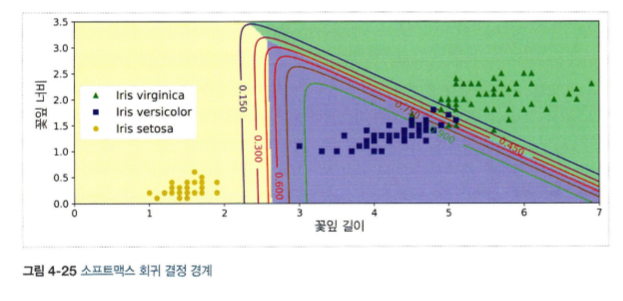

결정 경계를 배경색으로 구분하여 나타냄

클래스 사이 결정 경계 모두 선형

iris-versicolor클래스에 대한 확률을 곡선으로 나타냄-> 추정확률 50%이하인 클래스를 예측 가능-> 모든 결정 경계가 만나는 지점에서는 모든 클래스가 동일하게 33%의 추정호가률 가짐